# MBAN 6110 Final Exam

In [1]:
# import EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('churn_data.csv')
df

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,35,Great Britain,iOS,496.165324,84,1,735.148231,60,...,708.936256,77,4,672.755957,23,5,710.675753,60,4,0
9996,9996,9997,59,Great Britain,iOS,138.836616,76,3,673.599667,52,...,736.393247,57,4,379.113761,75,4,870.230372,15,3,0
9997,9997,9998,45,US,iOS,533.289217,106,4,367.139990,41,...,567.421148,50,3,633.113010,89,5,624.403650,35,4,0
9998,9998,9999,58,Australia,iOS,684.746137,70,0,751.149320,105,...,239.675846,32,5,103.703552,97,5,731.775049,28,4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

There appear to be no missing values in the data frame. Each column has 10,000 non-null entries. With respect to data types, all '_Spend' columns appear to be a float, whereas Items and Support Calls are integers. This is as expected in keeping with the idea that Items cannot be sold in partial units and similarly, there is little significance in a fraction of a Support Call. No data cleaning required. Let's proceed to look a descriptive statistics.

In [4]:
df.describe(include='all')

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.00000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Canada,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4258,5736,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4999.50000,5000.50000,42.698500,NaN,NaN,482.593336,64.657700,2.488800,476.297118,63.118000,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,2886.89568,12.495528,NaN,NaN,237.961476,29.329527,1.711306,237.491820,28.933247,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,0.00000,1.00000,20.000000,NaN,NaN,45.147050,12.000000,0.000000,46.283232,12.000000,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2499.75000,2500.75000,32.000000,NaN,NaN,275.978779,39.000000,1.000000,268.427326,38.000000,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,4999.50000,5000.50000,43.000000,NaN,NaN,482.173250,65.000000,2.000000,474.442784,63.000000,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7499.25000,7500.25000,53.000000,NaN,NaN,688.898992,90.000000,4.000000,680.824377,88.000000,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000


Some issues to address: 
- It appears we have a second index column entitled 'Unnamed: 0' which needs to be dropped from the data frame. CustomerID also appears to be the same as the index so it's unlikely the column is useful and likely also can be dropped. 
- Ages range from 20 to 65, stored as an integer. We will assume that the Age is a result of a calculation from birth date and hence, an integer. 
- Location and Device are categorical columns which will need to be encoded for the model.
- Churn appears to be categorical and a natural model target variable. Per the data dictionary, 1 implies churned last month and 0 implies did not. 
- Spend columns are continuous, items and support call discrete. 

In [5]:
# drop extra column 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# check location column 
df['Location'].unique()

array(['US', 'Canada', 'Great Britain', 'Australia'], dtype=object)

In [7]:
df['Device'].unique()

array(['iOS', 'Android'], dtype=object)

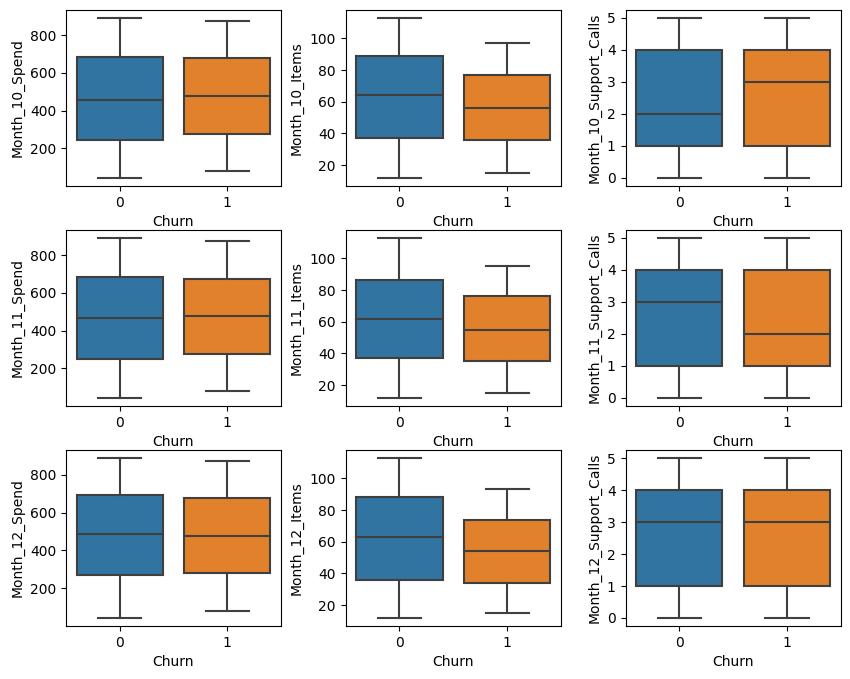

In [8]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9),) = plt.subplots(3, 3, figsize=(10, 8))
sns.boxplot(x='Churn', y='Month_10_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn', y='Month_10_Items', data=df, ax=ax2)
sns.boxplot(x='Churn', y='Month_10_Support_Calls', data=df, ax=ax3)
sns.boxplot(x='Churn', y='Month_11_Spend', data=df, ax=ax4)
sns.boxplot(x='Churn', y='Month_11_Items', data=df, ax=ax5)
sns.boxplot(x='Churn', y='Month_11_Support_Calls', data=df, ax=ax6)
sns.boxplot(x='Churn', y='Month_12_Spend', data=df, ax=ax7)
sns.boxplot(x='Churn', y='Month_12_Items', data=df, ax=ax8)
sns.boxplot(x='Churn', y='Month_12_Support_Calls', data=df, ax=ax9)

plt.subplots_adjust(wspace=0.3, hspace=0.25)

In the time leading up to the increased churn, we see: 
- Spending and items to remain rather constant amount churners and non-churners alike in the three months leading up to the churn. 
- Support calls to on average increase for customers who churned. 

## Trends by Month 

[482.59333550955404, 476.29711800107435, 481.96531438386745, 476.43466011161405, 475.3121791526706, 476.06203974513767, 473.70255517010156, 477.4406086834507, 476.3240404413095, 473.63052394065323, 472.6711259775001, 478.6293296820226]


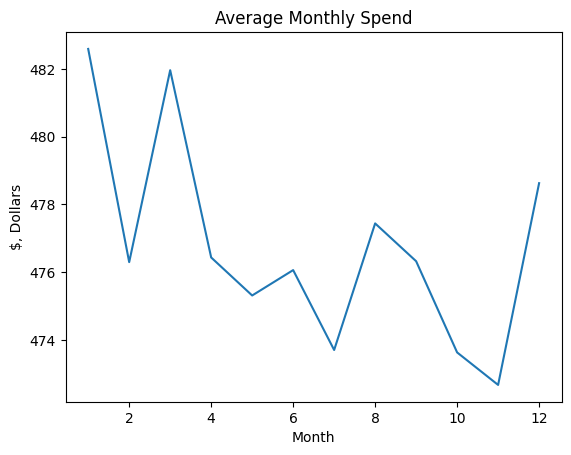

In [9]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

spend = []
for i in range(4, 40, 3):
    spend.append((df.iloc[:, i]).mean())

print(spend)
plt.xlabel('Month')
plt.ylabel('$, Dollars')
plt.title('Average Monthly Spend')
sns.lineplot(x=month, y=spend)
plt.show()

[64.6577, 63.118, 62.8716, 61.8487, 61.2979, 60.785, 60.4544, 59.3574, 58.6569, 58.2279, 56.9689, 56.5126]


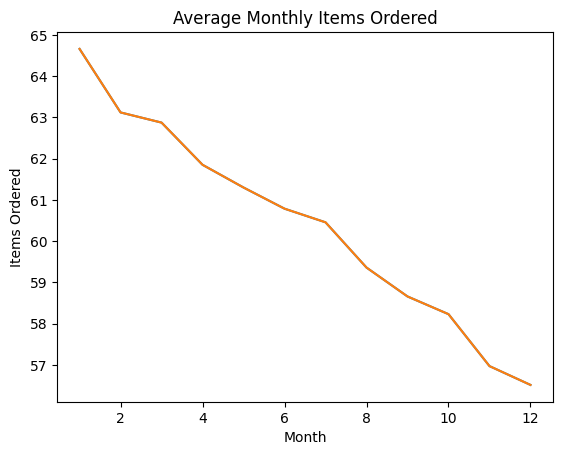

In [10]:
items = []
for i in range(5, 41, 3):
    items.append((df.iloc[:, i]).mean())

print(items)
sns.lineplot(x=month, y=items)

plt.xlabel('Month')
plt.ylabel('Items Ordered')
plt.title('Average Monthly Items Ordered')
sns.lineplot(x=month, y=items)
plt.show()

[2.4888, 2.5174, 2.5151, 2.496, 2.4871, 2.5013, 2.4874, 2.5157, 2.5033, 2.487, 2.5195, 2.4963]


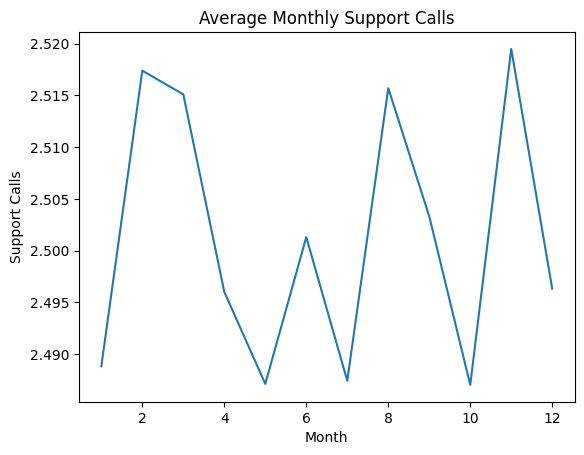

In [11]:
support_calls = []
for i in range(6, 41, 3):
    support_calls.append((df.iloc[:, i]).mean())

print(support_calls)
plt.xlabel('Month')
plt.ylabel('Support Calls')
plt.title('Average Monthly Support Calls')
sns.lineplot(x=month, y=support_calls)
plt.show()

Key findings: 
- Month 12 represents a sharp increase in the average monthly spent per customer after a period of decline. 
- Tne number of items being order in total is decreasing over time throughout the year preceding the increase in churn. 
- There was an overall decrease in average number of support calls. However, from our box plot, among the customers who churned, the average number of support calls increased. 

In [12]:
# Where did churn happen the most?
df2 = df.groupby(['Churn', 'Location'])['Month_12_Spend'].sum().reset_index()
df2

,Churn,Location,Month_12_Spend
0,0,Australia,3.389538e+05
1,0,Canada,3.721367e+05
2,0,Great Britain,3.694388e+05
3,0,US,3.616555e+05
4,1,Canada,1.682267e+06
5,1,US,1.661842e+06


<Axes: xlabel='Location'>

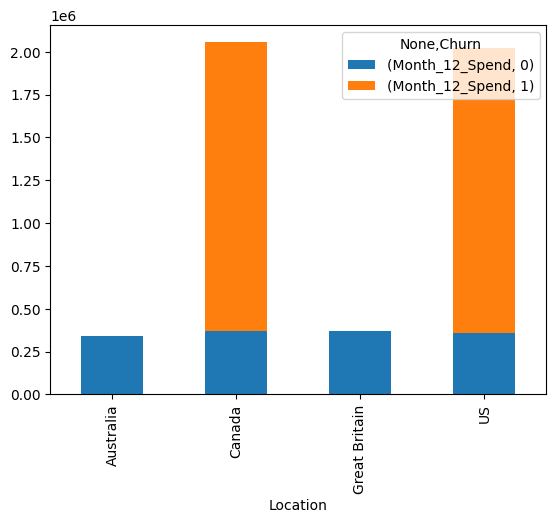

In [13]:
pd.pivot_table(data = df2, index = 'Location', columns='Churn').plot(kind='bar',stacked=True)

Key Finding: All the churn came from Canada and US markets. We anticipate location to be significant in our model. 

In [14]:
# On what type of devices did the churn come from?
df3 = df.groupby(['Churn', 'Device'])['Month_12_Spend'].sum().reset_index()
df3

,Churn,Device,Month_12_Spend
0,0,Android,4.292520e+05
1,0,iOS,1.012933e+06
2,1,Android,2.296716e+06
3,1,iOS,1.047392e+06


<Axes: xlabel='Device'>

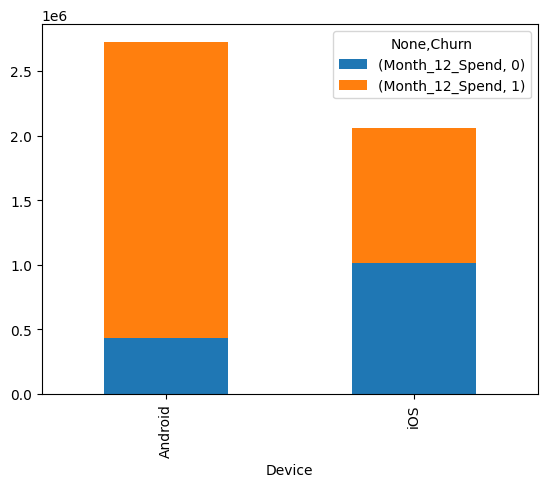

In [15]:
pd.pivot_table(data = df3, index = 'Device', columns='Churn').plot(kind='bar',stacked=True)

Key Finding: The majority of the churn value volume came from Android users. We anticipate that Device will be signficant in our model. 

In [16]:
# Did age play a factor in customer churn?
def age_groups(Age):
    if Age > 20 and Age < 35:
        return '20-35'
    elif Age > 35 and Age < 50:
        return '35-50'
    else:
        return '50-65'


df['age_group'] = df['Age'].apply(age_groups)

df3 = df.groupby(['Churn', 'age_group'])['Month_12_Support_Calls'].sum().reset_index()
df3

,Churn,age_group,Month_12_Support_Calls
0,0,20-35,1677
1,0,35-50,2692
2,0,50-65,3103
3,1,20-35,5699
4,1,35-50,5603
5,1,50-65,6189


<Axes: xlabel='age_group'>

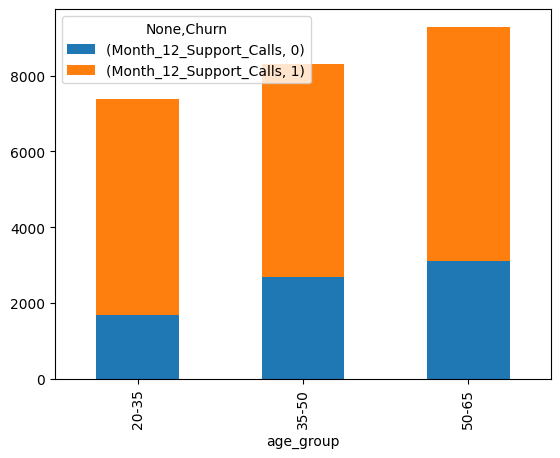

In [17]:
pd.pivot_table(data = df3, index = 'age_group', columns='Churn').plot(kind='bar',stacked=True)

Key Finding: It is not anticipated that Age was a consideration. Spend volume anticipated to increase with age organically.  

## Feature Engineering

In [18]:
# add column with the support calls for the last 3 months leading up to churn (10, 11, 12)
df['3m_support_calls'] = df['Month_10_Support_Calls'] + df['Month_11_Support_Calls'] + df['Month_12_Support_Calls']

In [19]:
# one hot encode the categorical variables
cat_col = ['Location', 'Device', 'age_group']
df_encoded = pd.get_dummies(df, columns=cat_col, dtype=int)

In [20]:
df_encoded.drop(['CustomerID', 'Age'], axis=1, inplace=True)

## Data Models

### Logistic Regression


In [21]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create a logistic regression model
log_reg = LogisticRegression(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=10)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Predict on the test set
y_pred = grid_search.predict(X_test)

#  cross validation score
# scores_lr = cross_val_score(log_reg, X, y, cv=10, scoring=make_scorer(f1_score))
# cv_score = np.mean(scores_logistic)
# print(f"Cross Validation Score: {precision * 100:.2f}%")

# Evaluation metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Calculating the accuracy of the model
print(f"Accuracy of Logistic Regression Model: {acc * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f'ROC AUC Score: {roc_auc:.2f}')

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of Logistic Regression Model: 86.90%
Precision: 87.77%
Recall: 80.04%
F1-Score: 82.65%
ROC AUC Score: 0.80


### Naive-Bayes

In [22]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score

# Loading the dataset
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gaussian Naive Bayes model
model = GaussianNB()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

scores_bayes = cross_val_score(model, X, y, cv=10, scoring=make_scorer(f1_score))
cv_score = np.mean(scores_bayes)
print(f"Cross Validation Score: {cv_score * 100:.2f}%")

print(f"Accuracy of Naive Bayes Model: {acc * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f'ROC AUC Score: {roc_auc:.2f}')


Cross Validation Score: 90.25%
Accuracy of Naive Bayes Model: 86.55%
Precision: 83.97%
Recall: 100.00%
F1-Score: 91.29%
ROC AUC Score: 0.77


### KNN 

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

# cross validation score
#scores_knn = cross_val_score(knn, X, y, cv=10, scoring=make_scorer(f1_score))
#cv_score = np.mean(scores_knn)
#print(f"Cross Validation Score: {cv_score * 100:.2f}%")

# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Calculating the accuracy of the model
print(f"Accuracy of KNN Model: {acc * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy of KNN Model: 86.55%
Precision: 83.97%
Recall: 100.00%
F1-Score: 91.29%
ROC AUC Score: 0.77


### SVC

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# cross validation score
scores_svc = cross_val_score(svc, X, y, cv=10, scoring=make_scorer(f1_score))
cv_score = np.mean(scores_svc)
print(f"Cross Validation Score: {cv_score * 100:.2f}%")

# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Calculating the accuracy of the model
print(f"Accuracy of SVC Model: {acc * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f'ROC AUC Score: {roc_auc:.2f}')


Cross Validation Score: 82.35%
Accuracy of SVC Model: 70.45%
Precision: 70.45%
Recall: 100.00%
F1-Score: 82.66%
ROC AUC Score: 0.50


### Decision Tree 

In [25]:
from sklearn.tree import DecisionTreeClassifier

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# cross validation score
scores_dt = cross_val_score(clf, X, y, cv=10, scoring=make_scorer(f1_score))
cv_score = np.mean(scores_dt)
print(f"Cross Validation Score: {cv_score * 100:.2f}%")

# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Calculating the accuracy of the model
print(f"Accuracy of Decision Tree: {acc * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f'ROC AUC Score: {roc_auc:.2f}')

Cross Validation Score: 96.96%
Accuracy of Decision Tree: 95.70%
Precision: 97.76%
Recall: 96.10%
F1-Score: 96.92%
ROC AUC Score: 0.95


### Finalizing My Model - Hypertunning the Decision Tree 

The model which had the best overall F1 Score was the Decision Tree. I will conduct some hypertuning to finalize the model and ensure the best possible result. 

In [26]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV


X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Getting the best model
best_clf = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# cross validation score
scores_dt = cross_val_score(clf, X, y, cv=10, scoring=make_scorer(f1_score))
cv_score = np.mean(scores_dt)
print(f"Cross Validation Score: {cv_score * 100:.2f}%")

# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Calculating the accuracy of the model
print(f"Accuracy of Hypertuned Decision Tree: {acc * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f'ROC AUC Score: {roc_auc:.2f}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross Validation Score: 96.95%
Accuracy of Hypertuned Decision Tree: 95.60%
Precision: 94.12%
Recall: 100.00%
F1-Score: 96.97%
ROC AUC Score: 0.93


## Explaining the Results 

Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.

- The initial hypothesis was location, device and the last three months of support calls would be a sufficient indicator in predicting churn. Spend and items purchased were found to be relatively constant over time. Churn was focused on the Canada and US Markets. Age does not appear to have an impact on churn. In general, average items per customer appears to be decreasing over time and should be addressed despite fluctuations in average spend. However, all monthly data was fed in to the models in the interest of time in exam pressure. 

(b) Your approach for building and evaluating the model. 
- To build the model, baseline models in logistic regression, Naive Bayes, KNN, SVM, and Decision Tree were attempted and evaluated using the same metrics. Some hypertuning was conducted on models that preformed poorly. Cross validation was also conducted on most models either via GridSearch, cross_val_score or both. The Decision Tree model outperformed other models in its baseline form reporting the strongest F1 score. 

(c) The final model you selected and how you know this is the best model for the problem.
- The final model is a decision trees enhanced with hypertuning. Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
- It has remarkable performance metric without overfitting the problem. 

(d) How the model should be used by the business, in business process.
- A data pipeline can be build to assess data in real time and a prediction of whether or not a customer is likely to churn can be issued. Should that customer call the support center, a promotional offer can be offered to try and maintain the customer. Additionally, certain geographic markets appear to be the most disatisfied with service and further investigation as to reasons why is recommended but outside the scope of this modelling exercise. 

Additional recommendations include: 
- On the business development side of things, churn trends can help marketers build customer personas to target a market segment with better messaging and boost customer acquisition.

- Continue studying North American customer segments. To better understand why a customer has churned, it is key to have proper customer segmentation. A user’s churn probability depends on their overall profile, their customer behavior when using your product, and their needs. A customer’s needs may change over the period of their subscription—not all churn happens in the first few months.

- (a joke) but give the data science team more than 3 hours! I would love to sit with this a bit more but hope I did enough for today. Thanks for an amazing term! 